In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import librosa as lr
import phonlab as phon
import importlib

print(phon.__version__)

0.0.23


### The basic case: specify a sound file name

* LPC analysis is used by default
* The filter order for lpc is chosen for you, to provide a good fit
* The returned Pandas dataframe has f0, F1-4, rms amplitude

LPC_tracking(), with order set to -1, and pitch range [63, 400]
Resampling from 16000 to 12000
Selected LPC order is: 10


[Text(0.5, 0, 'Time (seconds)'), Text(0, 0.5, 'Formants (Hz)')]

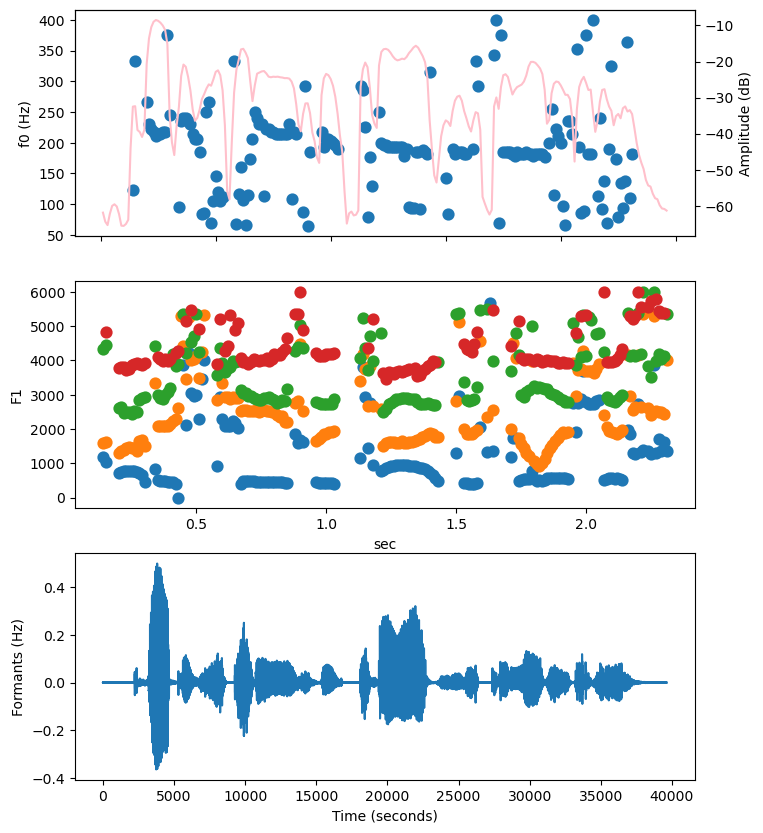

In [13]:
packagedir = importlib.resources.files('phonlab')
audiodir = Path('data/example_audio/')
filename = packagedir / audiodir / 'sf3_cln.wav'

x,fs = phon.loadsig(filename,chansel=[0])
df = phon.track_formants(x,fs)

threshold = np.min(df.rms) + (np.max(df.rms)-np.min(df.rms))/2
df['f0'] = np.where(df['rms']<threshold, np.nan, df.f0)  # replace low amplitude sections with NaN
df['F1'] = np.where(df['rms']<threshold, np.nan, df.F1)
df['F2'] = np.where(df['rms']<threshold, np.nan, df.F2)
df['F3'] = np.where(df['rms']<threshold, np.nan, df.F3)
df['F4'] = np.where(df['rms']<threshold, np.nan, df.F4)


fig, axs = plt.subplots(3,1,figsize=(8,10))

ax2 = axs[0].twinx()
sns.pointplot(df,x='sec',y='f0',linestyle='none',native_scale=True, ax=axs[0])
sns.lineplot(df,x='sec',y='rms',color="pink",ax=ax2)
axs[0].set(xticklabels=[],xlabel=None,ylabel='f0 (Hz)')  # remove the tick labels
ax2.set(ylabel="Amplitude (dB)")

axs[2].plot(x)
#axs[1].set(xticklabels=[],xlabel=None)  # remove the tick labels

sns.pointplot(df,x="sec",y="F1",linestyle='none',native_scale=True, ax=axs[1])
sns.pointplot(df,x="sec",y="F2",linestyle='none',native_scale=True, ax=axs[1])
sns.pointplot(df,x="sec",y="F3",linestyle='none',native_scale=True, ax=axs[1])
sns.pointplot(df,x="sec",y="F4",linestyle='none',native_scale=True, ax=axs[1])
axs[2].set(xlabel = "Time (seconds)",ylabel="Formants (Hz)")

### Use the Inverse Filter Control method

* The variable "speaker" must be set (0 = male, 1 = female, 2 = child)
* This example, adjusts the pitch range (f0_range) for a higher pitched voice
* We are also demonstrating the use of 'quiet' to suppress messages during track formants


In [16]:
df = phon.track_formants(x,fs, method='ifc', f0_range = [150,400], speaker = 1, quiet=True)

print(f"Median F2 is: {df.F2.median()}")
print(f"Mean f0 is: {df.f0.mean():0.1f}")

Median F2 is: 2058.35
Mean f0 is: 234.1


[Text(0.5, 0, 'Time (seconds)'), Text(0, 0.5, 'Formants (Hz)')]

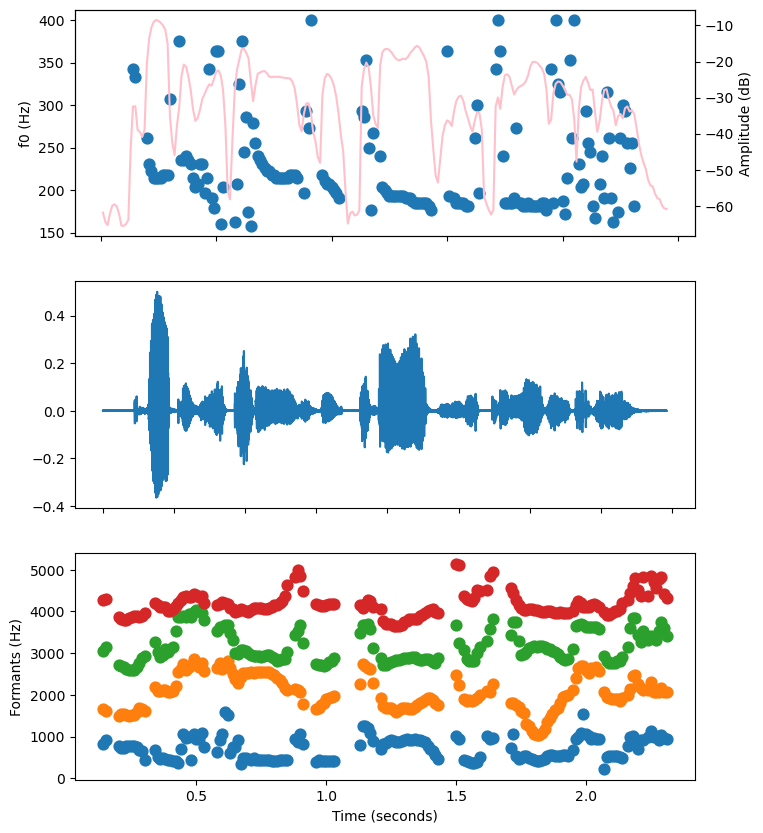

In [18]:
threshold = np.min(df.rms) + (np.max(df.rms)-np.min(df.rms))/2
df['f0'] = np.where(df['rms']<threshold, np.nan, df.f0)  # replace low amplitude sections with NaN
df['F1'] = np.where(df['rms']<threshold, np.nan, df.F1)
df['F2'] = np.where(df['rms']<threshold, np.nan, df.F2)
df['F3'] = np.where(df['rms']<threshold, np.nan, df.F3)
df['F4'] = np.where(df['rms']<threshold, np.nan, df.F4)


fig, axs = plt.subplots(3,1,figsize=(8,10))

ax2 = axs[0].twinx()
sns.pointplot(df,x='sec',y='f0',linestyle='none',native_scale=True, ax=axs[0])
sns.lineplot(df,x='sec',y='rms',color="pink",ax=ax2)
axs[0].set(xticklabels=[],xlabel=None,ylabel='f0 (Hz)')  # remove the tick labels
ax2.set(ylabel="Amplitude (dB)")

axs[1].plot(x)
axs[1].set(xticklabels=[],xlabel=None)  # remove the tick labels

sns.pointplot(df,x="sec",y="F1",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F2",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F3",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F4",linestyle='none',native_scale=True, ax=axs[2])
axs[2].set(xlabel = "Time (seconds)",ylabel="Formants (Hz)")

### Use the original IFC method

* Reusing the audio array that was read in the previous block
* This method is too slow to be very practical

In [22]:
df = phon.track_formants(x, fs, method = 'ifc_old', f0_range = [150,400], speaker=1)

print(f"\nMedian F2 is: {df.F2.median()}")
print(f"Mean f0 is: {df.f0.mean():0.1f}")

IFC_tracking(), using method ifc_old, with speaker set to 1, and pitch range [150, 400]
Resampling from 16000 to 12000
 done         

Median F2 is: 2058.397
Mean f0 is: 232.4
